In [497]:
import pandas as pd
from datetime import timedelta
from matplotlib import pyplot as plt

In [498]:
df = pd.read_csv('../data/smhi_temp_data_save.csv', usecols=[0, 1, 2, 3], header=6, sep=';')

In [499]:
df

,Datum,Tid (UTC),Lufttemperatur,Kvalitet
0,1944-01-01,07:00:00,1.6,G
1,1944-01-01,13:00:00,3.8,G
2,1944-01-01,18:00:00,4.2,G
3,1944-01-02,07:00:00,0.6,G
4,1944-01-02,13:00:00,3.8,G
...,...,...,...,...
435387,2006-12-05,09:00:00,9.4,G
435388,2006-12-05,10:00:00,10.1,Y
435389,2006-12-05,11:00:00,10.8,Y
435390,2006-12-05,12:00:00,10.9,G


In [500]:
df['Snittemperatur'] = df.groupby('Datum')['Lufttemperatur'].transform('mean').round(2)

In [501]:
df = df.groupby('Datum').max().drop('Lufttemperatur', axis=1).reset_index()

In [502]:
df

,Datum,Tid (UTC),Kvalitet,Snittemperatur
0,1944-01-01,18:00:00,G,3.20
1,1944-01-02,18:00:00,G,3.60
2,1944-01-03,18:00:00,G,2.80
3,1944-01-04,18:00:00,G,-4.47
4,1944-01-05,18:00:00,G,-1.40
...,...,...,...,...
22980,2006-12-01,23:00:00,Y,8.03
22981,2006-12-02,23:00:00,Y,8.81
22982,2006-12-03,23:00:00,Y,8.11
22983,2006-12-04,23:00:00,Y,8.57


In [503]:
num_rows = df.count(axis=0)[0]

C:\Users\olofs\AppData\Local\Temp\ipykernel_20272\83482794.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  num_rows = df.count(axis=0)[0]


In [504]:
num_rows

22985

In [505]:
df.dtypes

Datum              object
Tid (UTC)          object
Kvalitet           object
Snittemperatur    float64
dtype: object

In [506]:
df['Year'] = df['Datum'].str.split('-').str[0]

In [507]:
df

,Datum,Tid (UTC),Kvalitet,Snittemperatur,Year
0,1944-01-01,18:00:00,G,3.20,1944
1,1944-01-02,18:00:00,G,3.60,1944
2,1944-01-03,18:00:00,G,2.80,1944
3,1944-01-04,18:00:00,G,-4.47,1944
4,1944-01-05,18:00:00,G,-1.40,1944
...,...,...,...,...,...
22980,2006-12-01,23:00:00,Y,8.03,2006
22981,2006-12-02,23:00:00,Y,8.81,2006
22982,2006-12-03,23:00:00,Y,8.11,2006
22983,2006-12-04,23:00:00,Y,8.57,2006


In [508]:
df['Year'].value_counts().sort_values(ascending=False)

Year
1944    366
1972    366
2000    366
1968    366
2004    366
       ... 
2005    365
1981    365
1975    365
1979    365
2006    339
Name: count, Length: 63, dtype: int64

In [509]:
years = []
for ind, row in df.iterrows():
    year = row['Year']
    if year not in years:
        years.append(year)
    else:
        pass

In [510]:
years

['1944',
 '1945',
 '1946',
 '1947',
 '1948',
 '1949',
 '1950',
 '1951',
 '1952',
 '1953',
 '1954',
 '1955',
 '1956',
 '1957',
 '1958',
 '1959',
 '1960',
 '1961',
 '1962',
 '1963',
 '1964',
 '1965',
 '1966',
 '1967',
 '1968',
 '1969',
 '1970',
 '1971',
 '1972',
 '1973',
 '1974',
 '1975',
 '1976',
 '1977',
 '1978',
 '1979',
 '1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006']

In [511]:
df['Year'] = pd.to_datetime(df['Year'], yearfirst=True, format='%Y')

In [512]:
df.dtypes

Datum                     object
Tid (UTC)                 object
Kvalitet                  object
Snittemperatur           float64
Year              datetime64[ns]
dtype: object

In [513]:
df

,Datum,Tid (UTC),Kvalitet,Snittemperatur,Year
0,1944-01-01,18:00:00,G,3.20,1944-01-01
1,1944-01-02,18:00:00,G,3.60,1944-01-01
2,1944-01-03,18:00:00,G,2.80,1944-01-01
3,1944-01-04,18:00:00,G,-4.47,1944-01-01
4,1944-01-05,18:00:00,G,-1.40,1944-01-01
...,...,...,...,...,...
22980,2006-12-01,23:00:00,Y,8.03,2006-01-01
22981,2006-12-02,23:00:00,Y,8.81,2006-01-01
22982,2006-12-03,23:00:00,Y,8.11,2006-01-01
22983,2006-12-04,23:00:00,Y,8.57,2006-01-01


In [514]:
df['Datum'] = pd.to_datetime(df['Datum'], yearfirst=True, format='ISO8601')

In [515]:
df.to_csv('../data/Olof_Save_avg_daily_temp_data.csv', index=False, mode='w')

Time for percipitation


In [516]:
df_percipitation = pd.read_csv('../data/smhi_perc_data_save.csv',  usecols=[0, 1, 2, 3], header=6, sep=';')

In [517]:
df_percipitation

,Från Datum Tid (UTC),Till Datum Tid (UTC),Representativt dygn,Nederbördsmängd
0,1944-01-01 07:00:01,1944-01-02 07:00:00,1944-01-01,0.2
1,1944-01-02 07:00:01,1944-01-03 07:00:00,1944-01-02,0.4
2,1944-01-03 07:00:01,1944-01-04 07:00:00,1944-01-03,0.0
3,1944-01-04 07:00:01,1944-01-05 07:00:00,1944-01-04,0.0
4,1944-01-05 07:00:01,1944-01-06 07:00:00,1944-01-05,2.1
...,...,...,...,...
21514,2002-11-26 06:00:01,2002-11-27 06:00:00,2002-11-26,4.1
21515,2002-11-27 06:00:01,2002-11-28 06:00:00,2002-11-27,0.0
21516,2002-11-28 06:00:01,2002-11-29 06:00:00,2002-11-28,3.9
21517,2002-11-29 06:00:01,2002-11-30 06:00:00,2002-11-29,7.1


In [518]:
df_percipitation.sort_values(by=['Representativt dygn'])

,Från Datum Tid (UTC),Till Datum Tid (UTC),Representativt dygn,Nederbördsmängd
0,1944-01-01 07:00:01,1944-01-02 07:00:00,1944-01-01,0.2
1,1944-01-02 07:00:01,1944-01-03 07:00:00,1944-01-02,0.4
2,1944-01-03 07:00:01,1944-01-04 07:00:00,1944-01-03,0.0
3,1944-01-04 07:00:01,1944-01-05 07:00:00,1944-01-04,0.0
4,1944-01-05 07:00:01,1944-01-06 07:00:00,1944-01-05,2.1
...,...,...,...,...
21514,2002-11-26 06:00:01,2002-11-27 06:00:00,2002-11-26,4.1
21515,2002-11-27 06:00:01,2002-11-28 06:00:00,2002-11-27,0.0
21516,2002-11-28 06:00:01,2002-11-29 06:00:00,2002-11-28,3.9
21517,2002-11-29 06:00:01,2002-11-30 06:00:00,2002-11-29,7.1


In [519]:
df_percipitation = df_percipitation.drop(['Från Datum Tid (UTC)', 'Till Datum Tid (UTC)'], axis=1)

In [520]:
df_percipitation

,Representativt dygn,Nederbördsmängd
0,1944-01-01,0.2
1,1944-01-02,0.4
2,1944-01-03,0.0
3,1944-01-04,0.0
4,1944-01-05,2.1
...,...,...
21514,2002-11-26,4.1
21515,2002-11-27,0.0
21516,2002-11-28,3.9
21517,2002-11-29,7.1


In [521]:
num_rows_percipitaion = df_percipitation.count(axis=0)[0]

C:\Users\olofs\AppData\Local\Temp\ipykernel_20272\3562049814.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  num_rows_percipitaion = df_percipitation.count(axis=0)[0]


In [522]:
num_rows_percipitaion

21519

In [523]:
df_percipitation.dtypes

Representativt dygn     object
Nederbördsmängd        float64
dtype: object

In [524]:
df_percipitation['Year'] = df_percipitation['Representativt dygn'].str.split('-').str[0]

In [525]:
df_percipitation

,Representativt dygn,Nederbördsmängd,Year
0,1944-01-01,0.2,1944
1,1944-01-02,0.4,1944
2,1944-01-03,0.0,1944
3,1944-01-04,0.0,1944
4,1944-01-05,2.1,1944
...,...,...,...
21514,2002-11-26,4.1,2002
21515,2002-11-27,0.0,2002
21516,2002-11-28,3.9,2002
21517,2002-11-29,7.1,2002


In [526]:
df_percipitation['Representativt dygn'] = pd.to_datetime(df_percipitation['Representativt dygn'])
df_percipitation['Year'] = pd.to_datetime(df_percipitation['Year'], format='%Y')

In [527]:
df_percipitation

,Representativt dygn,Nederbördsmängd,Year
0,1944-01-01,0.2,1944-01-01
1,1944-01-02,0.4,1944-01-01
2,1944-01-03,0.0,1944-01-01
3,1944-01-04,0.0,1944-01-01
4,1944-01-05,2.1,1944-01-01
...,...,...,...
21514,2002-11-26,4.1,2002-01-01
21515,2002-11-27,0.0,2002-01-01
21516,2002-11-28,3.9,2002-01-01
21517,2002-11-29,7.1,2002-01-01


In [528]:
years_in_df_percipitation = df_percipitation['Year'].nunique()

In [529]:
years_in_df_percipitation

59

In [530]:
2002-1944

58

In [531]:
days_in_df_percipitation = df_percipitation['Representativt dygn'].nunique()

In [532]:
# same number ofr days as rows in the dataset. ie. no duplicate days
days_in_df_percipitation - num_rows_percipitaion

0

In [533]:
df_percipitation.to_csv('../data/olof_Save_daily_percipitation.csv', index=False, mode='w')

Time for the wind

In [534]:
df_wind = pd.read_csv('../data/smhi_wind_data_Save.csv', usecols=[0, 1, 2, 3, 4, 5], sep=';', header=7)

In [535]:
df_wind.dtypes

Datum             object
Tid (UTC)         object
Vindriktning     float64
Kvalitet          object
Vindhastighet    float64
Kvalitet.1        object
dtype: object

In [536]:
df_wind['Datum'] = pd.to_datetime(df_wind['Datum'])

In [537]:
df_wind

,Datum,Tid (UTC),Vindriktning,Kvalitet,Vindhastighet,Kvalitet.1
0,1951-01-01,00:00:00,100.0,G,3.0,G
1,1951-01-01,03:00:00,110.0,G,2.0,G
2,1951-01-01,06:00:00,70.0,G,2.0,G
3,1951-01-01,12:00:00,90.0,G,3.0,G
4,1951-01-01,15:00:00,70.0,G,4.0,G
...,...,...,...,...,...,...
430417,2006-12-05,09:00:00,190.0,G,8.0,G
430418,2006-12-05,10:00:00,190.0,Y,8.0,Y
430419,2006-12-05,11:00:00,200.0,Y,9.0,Y
430420,2006-12-05,12:00:00,200.0,G,11.0,G


In [538]:
df_wind = df_wind.drop(columns=['Kvalitet.1'])

In [539]:
df_wind

,Datum,Tid (UTC),Vindriktning,Kvalitet,Vindhastighet
0,1951-01-01,00:00:00,100.0,G,3.0
1,1951-01-01,03:00:00,110.0,G,2.0
2,1951-01-01,06:00:00,70.0,G,2.0
3,1951-01-01,12:00:00,90.0,G,3.0
4,1951-01-01,15:00:00,70.0,G,4.0
...,...,...,...,...,...
430417,2006-12-05,09:00:00,190.0,G,8.0
430418,2006-12-05,10:00:00,190.0,Y,8.0
430419,2006-12-05,11:00:00,200.0,Y,9.0
430420,2006-12-05,12:00:00,200.0,G,11.0


Plotting temperature


In [540]:
df

,Datum,Tid (UTC),Kvalitet,Snittemperatur,Year
0,1944-01-01,18:00:00,G,3.20,1944-01-01
1,1944-01-02,18:00:00,G,3.60,1944-01-01
2,1944-01-03,18:00:00,G,2.80,1944-01-01
3,1944-01-04,18:00:00,G,-4.47,1944-01-01
4,1944-01-05,18:00:00,G,-1.40,1944-01-01
...,...,...,...,...,...
22980,2006-12-01,23:00:00,Y,8.03,2006-01-01
22981,2006-12-02,23:00:00,Y,8.81,2006-01-01
22982,2006-12-03,23:00:00,Y,8.11,2006-01-01
22983,2006-12-04,23:00:00,Y,8.57,2006-01-01


In [541]:
df_avg_per_month = df.groupby(df['Datum'].dt.strftime('%Y-%m'))['Snittemperatur'].mean().reset_index()

In [542]:
df_avg_per_month['Datum'].nunique

<bound method IndexOpsMixin.nunique of 0      1944-01
1      1944-02
2      1944-03
3      1944-04
4      1944-05
        ...   
751    2006-08
752    2006-09
753    2006-10
754    2006-11
755    2006-12
Name: Datum, Length: 756, dtype: object>

In [543]:
df_avg_per_month.tail(12)

,Datum,Snittemperatur
744,2006-01,-3.076452
745,2006-02,-1.678214
746,2006-03,-3.363871
747,2006-04,5.190667
748,2006-05,11.445161
749,2006-06,15.132333
750,2006-07,19.259677
751,2006-08,16.954839
752,2006-09,15.933000
753,2006-10,11.172903


In [544]:
df_avg_per_month['Datum'] = pd.to_datetime(df_avg_per_month['Datum'])

In [545]:
df_avg_per_month_compressed = df_avg_per_month.groupby(df_avg_per_month['Datum'].dt.strftime('%m'))['Snittemperatur'].mean().reset_index()

In [546]:
df_avg_per_month_compressed

,Datum,Snittemperatur
0,01,-1.078571
1,02,-1.426258
2,03,1.253420
3,04,5.742302
4,05,11.226959
5,06,14.842206
6,07,16.818157
7,08,16.258228
8,09,12.611249
9,10,8.336959


In [547]:
df

,Datum,Tid (UTC),Kvalitet,Snittemperatur,Year
0,1944-01-01,18:00:00,G,3.20,1944-01-01
1,1944-01-02,18:00:00,G,3.60,1944-01-01
2,1944-01-03,18:00:00,G,2.80,1944-01-01
3,1944-01-04,18:00:00,G,-4.47,1944-01-01
4,1944-01-05,18:00:00,G,-1.40,1944-01-01
...,...,...,...,...,...
22980,2006-12-01,23:00:00,Y,8.03,2006-01-01
22981,2006-12-02,23:00:00,Y,8.81,2006-01-01
22982,2006-12-03,23:00:00,Y,8.11,2006-01-01
22983,2006-12-04,23:00:00,Y,8.57,2006-01-01


In [548]:
for ind, val in df.iterrows():
    print(val[3])
    print(type(val))
    break

3.2
<class 'pandas.core.series.Series'>


C:\Users\olofs\AppData\Local\Temp\ipykernel_20272\3226641031.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(val[3])


In [549]:
# month = 1
# temps_in_jan = []

# for ind, val in df_avg_per_month.iterrows():
#     if val[0].month == 1:
#         print(val[1])
#         temps_in_jan.append(val[1])


In [550]:
# for ind, val in df_avg_per_month.iterrows():
#     if val[0].month == 2:
#         print(val[1])
#         # temps_in_jan.append(val[1])


In [551]:
# def calc_avg_for_each_month():
#     # months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
#     month_list_dict = {'Jan': [], 'Feb': [], 'Mar': [], 'Apr': [], 'May': [], 'June': [], 'Jul': [], 'Aug': [], 'Sep': [], 'Oct': [], 'Nov': [], 'Dec': []}
#     month_list = [[] for i in range(1, 13)]
#     for i, x in enumerate(month_list_dict):
#         # month_list[i].append(i)
#         # print(months[i])
#         # print(month_list)
#         for ind, val in df_avg_per_month.iterrows():
#             # print(ind)
#             print(val[0].month)
#             if val[0].month == i+1:
#                 x.append(val[1])
#     return month_list

#         # for ind, val in df_avg_per_month.iterrows():
#         #     if val[0].month == i:
#         #         month_list[i].append(val[0])


In [552]:
# def calc_avg_for_each_month_dict():
#     # months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
#     month_list_dict = {'Jan': [], 'Feb': [], 'Mar': [], 'Apr': [], 'May': [], 'June': [], 'Jul': [], 'Aug': [], 'Sep': [], 'Oct': [], 'Nov': [], 'Dec': []}
#     month_list = [[] for i in range(1, 13)]
#     for i, x in enumerate(month_list_dict.values()):
#         # month_list[i].append(i)
#         # print(months[i])
#         # print(month_list)
#         for ind, val in df_avg_per_month.iterrows():
#             # print(ind)
#             print(val[0].month)
#             if val[0].month == i+1:
#                 x.append(val[1])
#     return month_list_dict

#         # for ind, val in df_avg_per_month.iterrows():
#         #     if val[0].month == i:
#         #         month_list[i].append(val[0])

In [553]:
def calc_avg_for_each_month():
    month_list_dict = {'Jan': [], 'Feb': [], 'Mar': [], 'Apr': [], 'May': [], 'June': [], 'Jul': [], 'Aug': [], 'Sep': [], 'Oct': [], 'Nov': [], 'Dec': []}
    for i, x in enumerate(month_list_dict.values()):
        for ind, val in df_avg_per_month.iterrows():
            if val[0].month == i+1:
                x.append(val[1])
    return month_list_dict


In [554]:
month_list_dict = calc_avg_for_each_month()

C:\Users\olofs\AppData\Local\Temp\ipykernel_20272\2385294095.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if val[0].month == i+1:
C:\Users\olofs\AppData\Local\Temp\ipykernel_20272\2385294095.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x.append(val[1])
C:\Users\olofs\AppData\Local\Temp\ipykernel_20272\2385294095.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if val[0].month == i+1:
C:\Users\olofs\AppData\Local\Tem

C:\Users\olofs\AppData\Local\Temp\ipykernel_20272\2385294095.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if val[0].month == i+1:
C:\Users\olofs\AppData\Local\Temp\ipykernel_20272\2385294095.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x.append(val[1])
C:\Users\olofs\AppData\Local\Temp\ipykernel_20272\2385294095.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if val[0].month == i+1:
C:\Users\olofs\AppData\Local\Tem

In [555]:
len(month_list_dict['Jan'])

63

In [556]:
for i in month_list_dict.values():
    print(len(i))

63
63
63
63
63
63
63
63
63
63
63
63


In [557]:
jul = month_list_dict['Jul']

In [558]:
years = list(range(1944, 2007))
df_juli = pd.DataFrame({'Snittemperatur Juli': jul, 'År': years})

In [559]:
df_juli['År'] = pd.to_datetime(df_juli['År'], yearfirst=True, format='%Y')

In [560]:
df_juli

,Snittemperatur Juli,År
0,19.570968,1944-01-01
1,19.203226,1945-01-01
2,18.796452,1946-01-01
3,18.807097,1947-01-01
4,17.918065,1948-01-01
...,...,...
58,17.434516,2002-01-01
59,18.007742,2003-01-01
60,15.058387,2004-01-01
61,17.892903,2005-01-01


<function matplotlib.pyplot.show(close=None, block=None)>

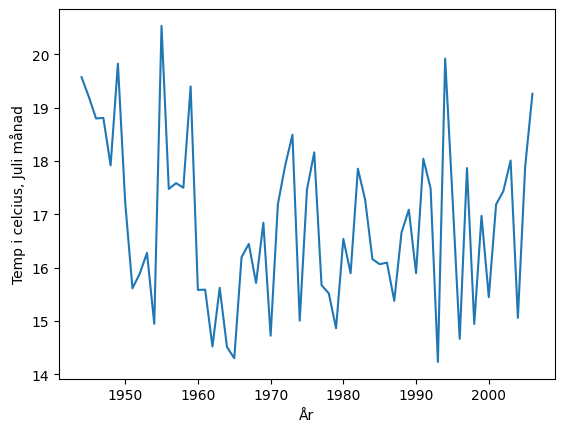

In [561]:
plt.figure

plt.plot(df_juli['År'], df_juli['Snittemperatur Juli'])
plt.ylabel('Temp i celcius, Juli månad')
plt.xlabel('År')
plt.show

In [562]:
jan = month_list_dict['Jan']

In [563]:
# years = list(range(1944, 2007))
df_jan = pd.DataFrame({'Snittemperatur Juli': jan, 'År': years})

<function matplotlib.pyplot.show(close=None, block=None)>

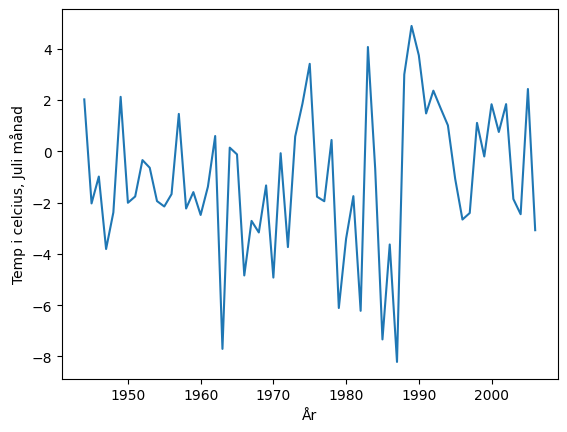

In [564]:
plt.figure

plt.plot(df_jan['År'], df_jan['Snittemperatur Juli'])
plt.ylabel('Temp i celcius, Juli månad')
plt.xlabel('År')
plt.show